<a href="https://colab.research.google.com/github/202422/Online-Shoppers-Purchasing-Intention/blob/main/Univariate%20and%20Bivariate%20Analysis/Univariate%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages and Dataset Import**

In [ ]:
!pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image

In [ ]:
df = pd.read_csv("/content/Cleaned_dataset.csv")
df

Administrative  Administrative_Duration  Informational  \
0                  0                      0.0              0   
1                  0                      0.0              0   
2                  0                      0.0              0   
3                  0                      0.0              0   
4                  0                      0.0              0   
...              ...                      ...            ...   
9176               3                    145.0              0   
9177               0                      0.0              0   
9178               0                      0.0              0   
9179               4                     75.0              0   
9180               0                      0.0              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                        0.0               2                64.000000   
1                        0.0              10               627.500000   
2                        0.0              19               154.216667   
3                        0.0               2                37.000000   
4                        0.0               3               738.000000   
...                      ...             ...                      ...   
9176                     0.0              53              1783.791667   
9177                     0.0               5               465.750000   
9178                     0.0               6               184.250000   
9179                     0.0              15               346.000000   
9180                     0.0               3                21.250000   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0        0.000000   0.100000    0.000000         0.0   Feb                 2   
1        0.020000   0.050000    0.000000         0.0   Feb                 3   
2        0.015789   0.024561    0.000000         0.0   Feb                 2   
3        0.000000   0.100000    0.000000         0.8   Feb                 2   
4        0.000000   0.022222    0.000000         0.4   Feb                 2   
...           ...        ...         ...         ...   ...               ...   
9176     0.007143   0.029031   12.241717         0.0   Dec                 4   
9177     0.000000   0.021333    0.000000         0.0   Nov                 3   
9178     0.083333   0.086667    0.000000         0.0   Nov                 3   
9179     0.000000   0.021053    0.000000         0.0   Nov                 2   
9180     0.000000   0.066667    0.000000         0.0   Nov                 3   

      Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0           2       1            2  Returning_Visitor    False    False  
1           3       1            4  Returning_Visitor     True    False  
2           2       1            3  Returning_Visitor    False    False  
3           2       2            3  Returning_Visitor    False    False  
4           4       1            2  Returning_Visitor    False    False  
...       ...     ...          ...                ...      ...      ...  
9176        6       1            1  Returning_Visitor     True    False  
9177        2       1            8  Returning_Visitor     True    False  
9178        2       1           13  Returning_Visitor     True    False  
9179        2       3           11  Returning_Visitor    False    False  
9180        2       1            2        New_Visitor     True    False  

[9181 rows x 18 columns]

In [ ]:
# Create lists of quantitative and qualitative features
quantitative_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
qualitative_features = [x for x in df.columns.to_list() if x not in quantitative_features]
qualitative_features.remove('Revenue')

In [ ]:
qualitative_features

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

# **I. Quantitative features**

## **1. Summary Statistics**

In [ ]:
df[quantitative_features].describe()

Administrative  Administrative_Duration  Informational  \
count     9181.000000              9181.000000    9181.000000   
mean         1.599826                45.781779       0.237229   
std          2.137123                75.823686       0.631535   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.000000                 0.000000       0.000000   
75%          3.000000                65.500000       0.000000   
max          8.000000               436.000000       3.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             9181.000000     9181.000000              9181.000000   
mean                 8.748442       23.602440               855.208819   
std                 33.534652       22.094905               908.645567   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        8.000000               199.490476   
50%                  0.000000       16.000000               535.500000   
75%                  0.000000       32.000000              1202.875000   
max                313.000000      121.000000              5044.756890   

       BounceRates    ExitRates   PageValues  SpecialDay  
count  9181.000000  9181.000000  9181.000000  9181.00000  
mean      0.010748     0.034536     2.600721     0.06618  
std       0.018191     0.027548     7.558149     0.20663  
min       0.000000     0.000000     0.000000     0.00000  
25%       0.000000     0.014545     0.000000     0.00000  
50%       0.000000     0.026316     0.000000     0.00000  
75%       0.014286     0.046667     0.000000     0.00000  
max       0.110714     0.133333    43.252000     1.00000

These statistics present us many informations like the number of observations (9181) in dataset. But most importants ones show that:


*   users visit the **administrative pages** on average **1.59 times**, the maximum number of visited administrative pages is **8** while the minimum is **0**
*   users last on **Administrative pages** on average **45.78**, the maximum time spent on these pages is **436.0** while the minimum is **0**
*   **informational pages** are visited on average **0.23**, the maximum number of visits is **3** while the minimum is **0**.
*   users last on average **8.74** on **informational pages**, the maximum time spent on these pages is **313.0** while the minimum is **0**
*   pages **related to product** are visited **23.6 times** on average, the maximum number of page visited by a user is **121** while the minimum is **0**
*   average **time spent on product related pages** is **855.2**, the maximum time is **5044.76** while the minimum is **0**.
*   a mean value of **bounce rates** is **0.01**, the maximum is **0.11** and the minimum is **0**
*   a mean value of **exit rates** is **0.03**, the maximum is **0.13** and the minimum is **0**
*   a mean value of **PageValues** is **2.6**, the maximum is **43.25** and the minimum is **0**
*   the average **closeness of the site's visit to a Special Day** is **0.06**, the maximum closeness is **1** while the minimum is **0**

## **2. Visualization**

In [ ]:
# Displaying histogram and boxplot for each quantitative feature
for i, col in enumerate(quantitative_features):
  fig1 = px.histogram(df, x = col)
  fig2 = px.box(df, y = col, points = "all")
  fig = make_subplots(rows=1, cols=2, subplot_titles = [f"Histogram of {col}",f"Boxplot of {col}"])
  fig.add_traces(fig1.data, rows = 1, cols = 1)
  fig.add_traces(fig2.data, rows = 1, cols = 2)

  # Define a unique filename for each column
  filename = f"plot_{i}_{col}.png"

  # Save figure
  fig.write_image(filename)

  fig.show()

**Code below is used to display plots generated before. Because Plotly uses interactive JavaScript (plotly.js) for rendering plots and GitHub does not execute JavaScript inside notebooks**

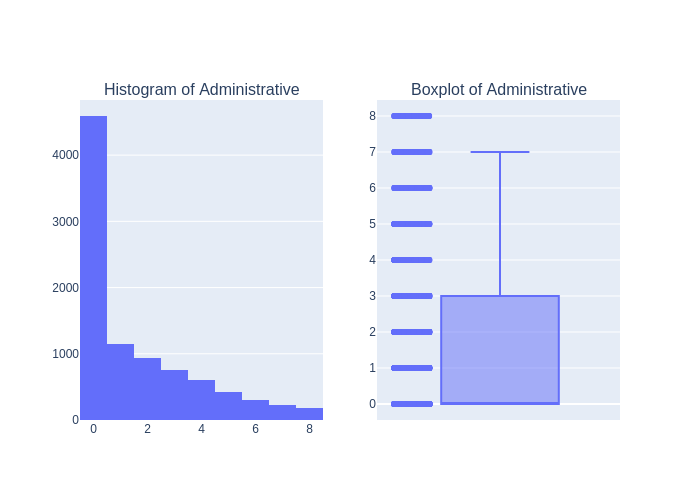

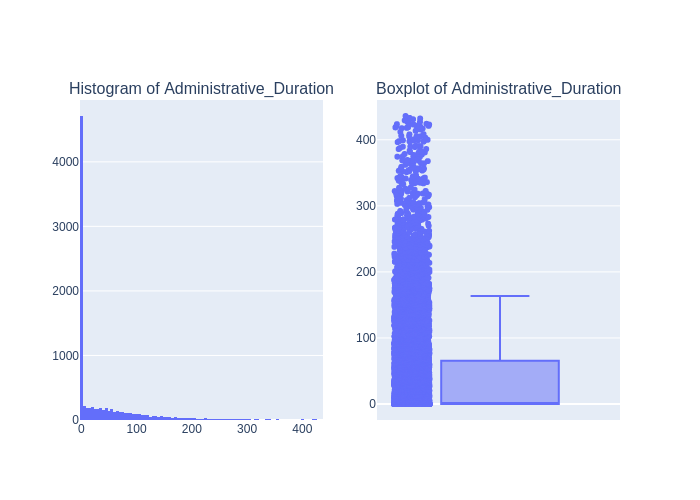

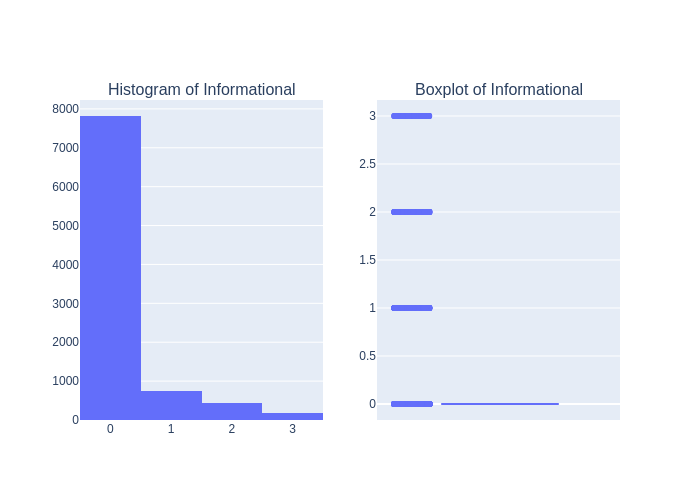

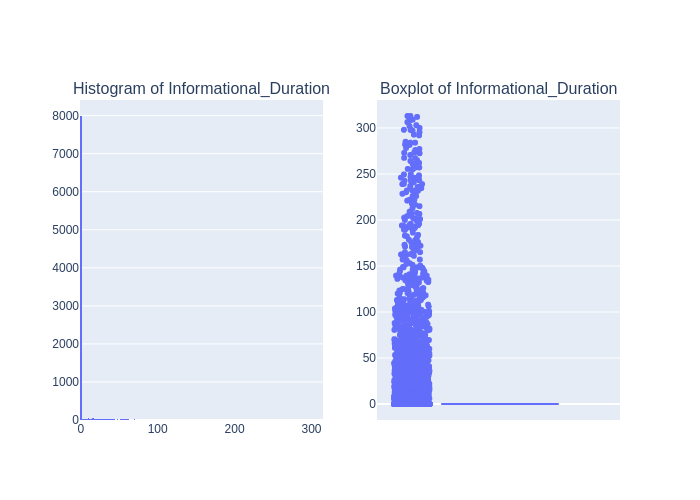

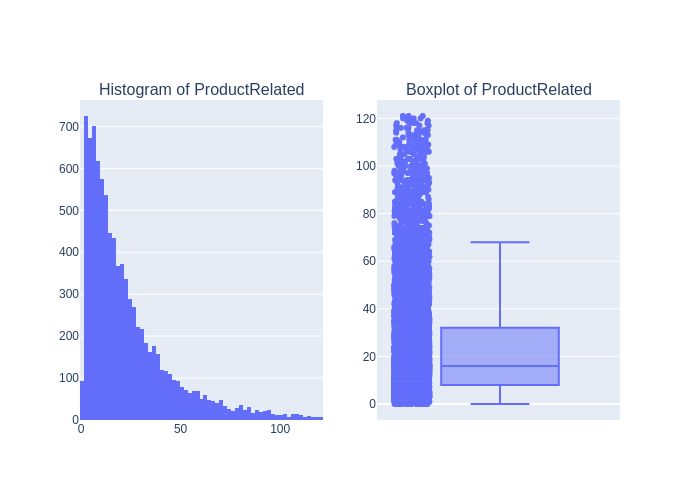

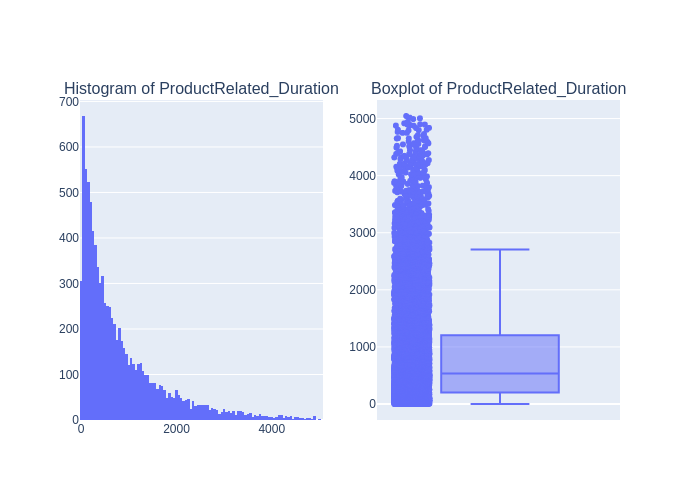

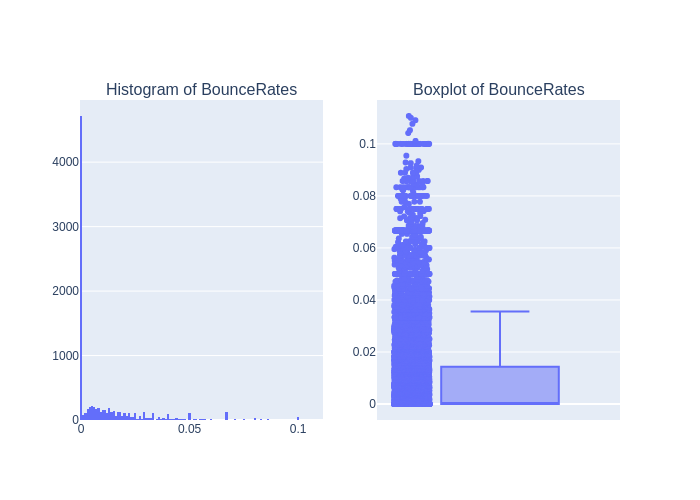

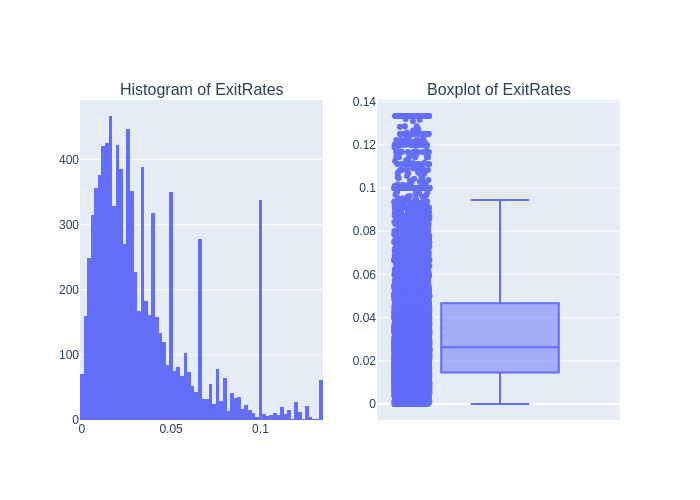

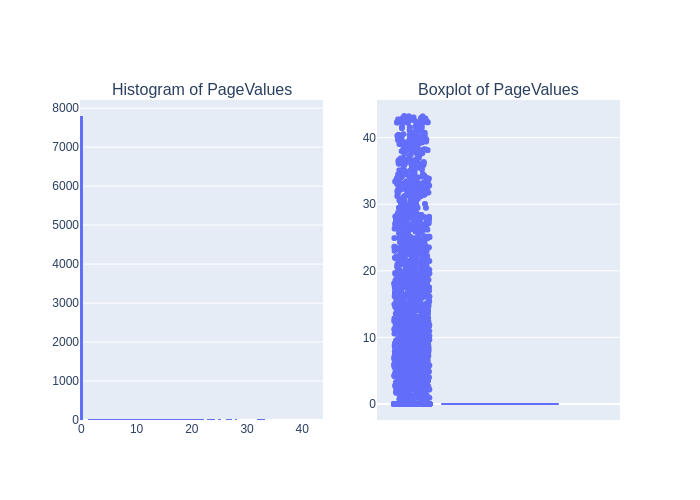

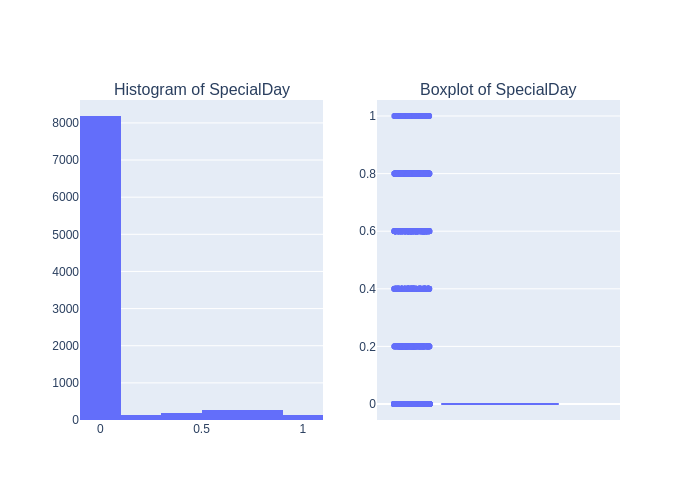

In [ ]:
for i, col in enumerate(quantitative_features):
    # Filename for each column
    filename = f"plot_{i}_{col}.png"

    # Display the saved image in Colab
    display(Image(filename))

**Key Insights**:

* More than 50% of the observations in the administrative column are equal to 0. The remaining observations have these values 1, 2, 3, 4, 5, 6, 7 and 8; the higher the value, the fewer the observations with that value.
* More than 50% of the observations in the administrative_Duration column are equal to 0. The remaining observations have values between 0 (exclusive) and 436 (inclusive); as the value increases, the number of observations decreases.
* More than 80% of occurrences in the Informational column are equal to 0. The remaining observations have these values 1, 2 and 3; the higher the value, the fewer the observations with that value.
* More than 80% of the observations in the Informational_Duration column are equal to 0. The remaining observations have values between 0 (exclusive) and 313 (inclusive); as the value increases, the number of observations decreases.
* Exactly 50% of the occurrences in the ProductRelated column are between 8 (inclusive) and 32 (inclusive). The remaining observations have these values between 0 (inclusive) and 8 (exclusive) and between 32 (exclusive) and 121 (inclusive)
* Exactly 50% of the observations in the ProductRelated_Duration column are between 199.46 and 1202,88. The remaining observations have values between 0 (inclusive) and 199.46  (exclusive) and between 1202.88  (exclusive) and 5044,75 (inclusive)
* More than 50% of the observations in the Bounce_Rates column are equal to 0. The remaining observations have values between 0 (exclusive) and 0.11 (inclusive).
* Exactly 50% of the occurences in the ExitRates column are between 0.014 and 0.046. The remaining observations have values between 0 (inclusive) and 0.014  (exclusive) and between 0.046  (exclusive) and 0.133 (inclusive).
* More than 90% of the observations in the PageValues column are equal to 0. The remaining observations have values between 0 (exclusive) and 43.25 (inclusive)
* More than 89% of the observations in the SpecialDay column are equal to 0. The remaining observations have these values 0.2, 0.4, 0.6, 0.8 and 1.






## **3. Insights Summary**

After using these statistical and visualization tools, I have collected some key informations about quantitative features.



**1.   When users visit the website, they spend a lot of time on product-related pages but little time on administrative and informational pages. This shows a high level of interest in product-related pages.**

**2.   BounceRates, ExitRates and  PageValues are almost equal to 0**

**3.   10% of users visit the website during a SpecialDay period**




# **II. Qualitative features**

## **1. Visualization**

In [ ]:
# Displaying pie chart and bar chart for each qualitative feature

# Define a fixed color palette
color_palette = px.colors.qualitative.Bold

for i, col in enumerate(qualitative_features):
    # Get unique categories for this feature
    unique_categories = df[col].unique()

    # Assign colors from the palette (cycle if more categories than colors)
    color_map = {category: color_palette[j % len(color_palette)] for j, category in enumerate(unique_categories)}

    # Apply color mapping to Pie Chart
    fig1 = px.pie(df, names=col, hole=0.4,
                  color=col,
                  color_discrete_map=color_map)  # Synchronize colors

    # Apply color mapping to Histogram
    fig2 = px.histogram(df, x=col, color=col,
                        text_auto=True,
                        color_discrete_map=color_map,  # Same color mapping
                        opacity=0.8,
                        barmode="group")


    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=[f"Pie Chart of {col}", f"Bar Chart of {col}"],
                        specs=[[{"type": "domain"}, {"type": "xy"}]])

    # Add traces
    fig.add_traces(fig1.data, rows=1, cols=1)
    fig.add_traces(fig2.data, rows=1, cols=2)

    # Define a unique filename for each column
    filename = f"plot_{i}_{col}.png"

    # Save figure
    fig.write_image(filename)

    fig.show()

**Code below is used to display plots generated before. Because Plotly uses interactive JavaScript (plotly.js) for rendering plots and GitHub does not execute JavaScript inside notebooks**

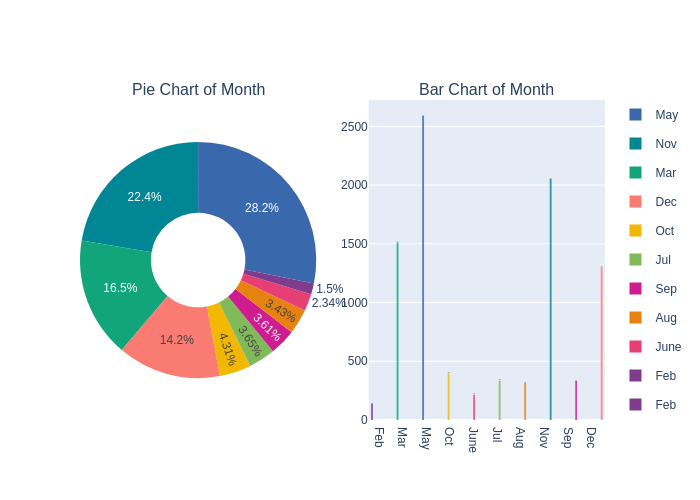

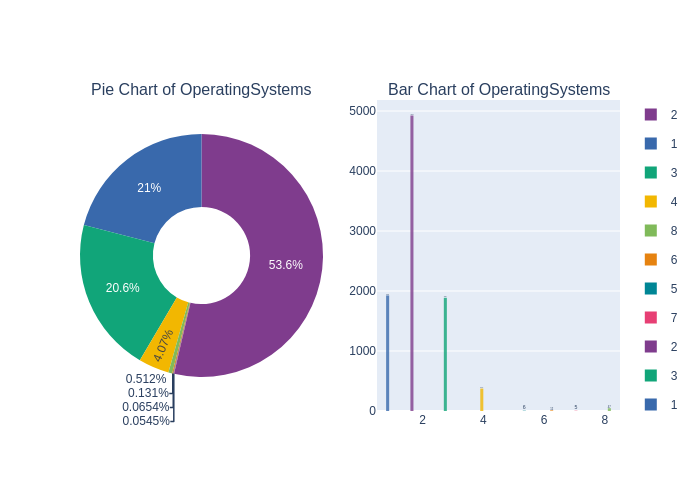

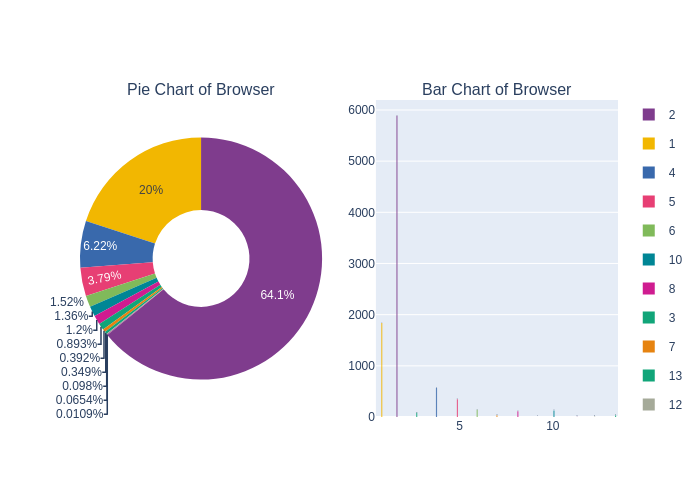

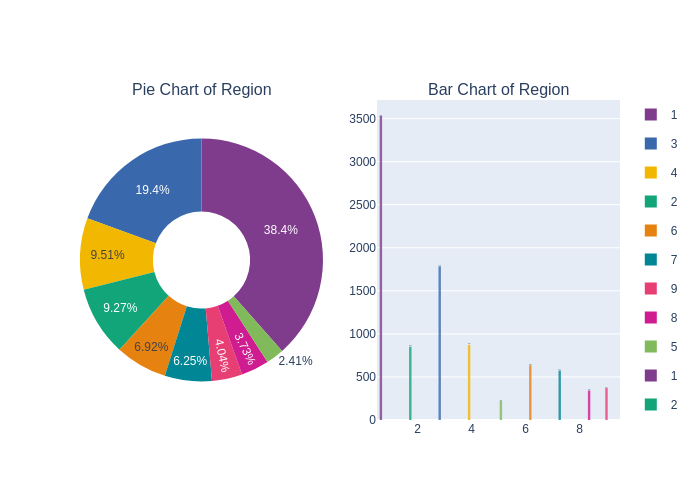

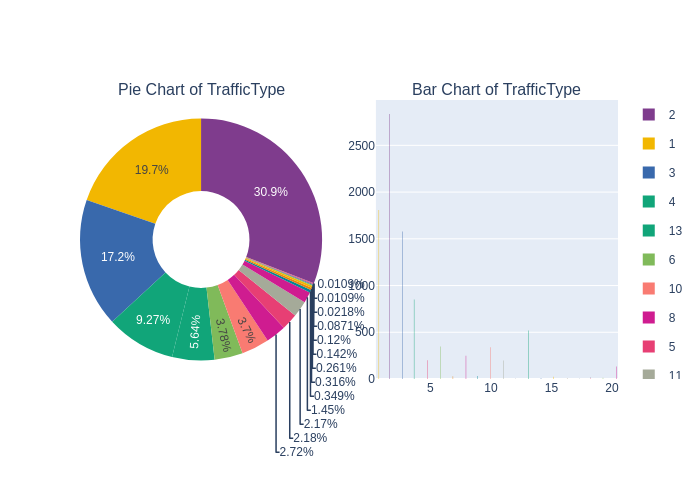

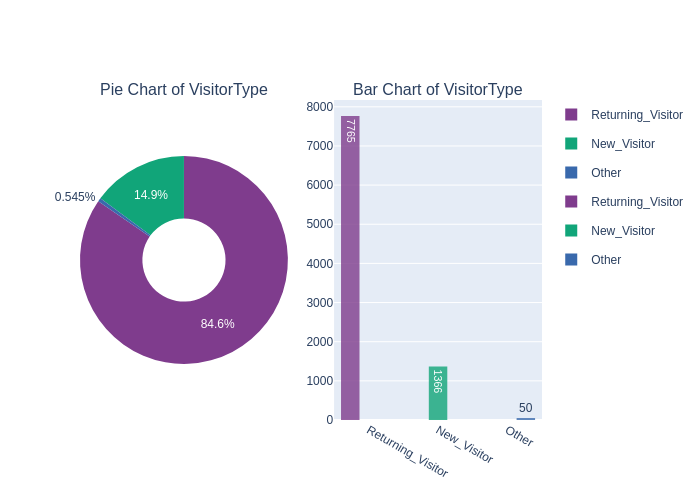

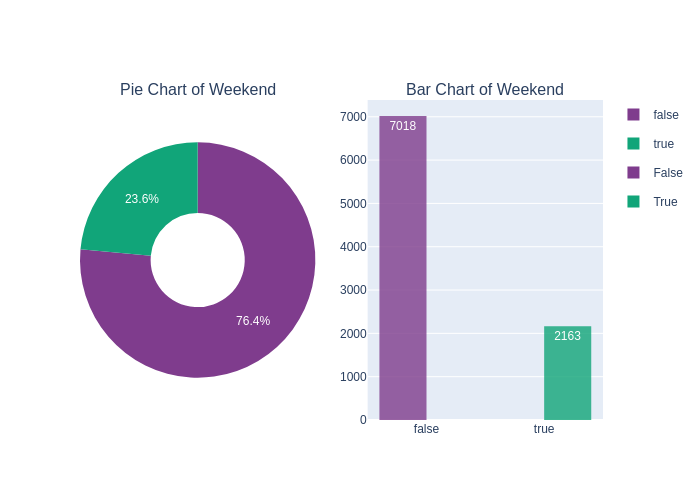

In [ ]:
for i, col in enumerate(qualitative_features):
   # Filename for each column
    filename = f"plot_{i}_{col}.png"

    # Display the saved image in Colab
    display(Image(filename))

**Key insights:**

* May, November, March, and December are the four most frequent months in the
Month column, with 28.2%, 22.4%, 16.5%, and 14.2%, respectively, totaling 81.3%. Only January and April are absent in Month Column
* 53.6% of Operating Systems used to visit website is type 2, 21% is type 1 and 20.6% is type 3.
* Among 11 Browser types, type 2 is the most frequent with 64.1% of observations, then type 1 browser comes with 20%
* In Region column, Region 1 is the most frequent with 38.4%, the following is region 3 with 19.4%.
* Traffic type 2, 1, 3 and 4 are the four most frequent with 30.9%, 19.7%, 17.2% and 9.27%.
* Almost 85% of Visitors are Returning visitors and 14.9% are New Visitors
Visits to the website occur 76.6% of the time during the week, with the remaining occurring on the weekend

## **2. Insights Summary**



**1. Users visit the website during mostly during May, November, March and December by using Operating Systems 2 and Browser 2.**

**2. Users are located most frequently in Region 1 and Region 3.**

**3. Visitors to the website are mostly returning users.**



# **III. Target**

In [ ]:
# Displaying pie chart and bar chart for target variable

# Define a fixed color palette
color_palette = px.colors.qualitative.Bold


# Get unique categories for target variable
unique_categories = df["Revenue"].unique()

# Assign colors from the palette (cycle if more categories than colors)
color_map = {category: color_palette[j % len(color_palette)] for j, category in enumerate(unique_categories)}

# Apply color mapping to Pie Chart
fig1 = px.pie(df, names="Revenue", hole=0.4,
                  color="Revenue",
                  color_discrete_map=color_map)  # Synchronize colors

# Apply color mapping to Histogram
fig2 = px.histogram(df, x="Revenue", color="Revenue",
                        text_auto=True,
                        color_discrete_map=color_map,  # Same color mapping
                        opacity=0.8,
                        barmode="group")


fig = make_subplots(rows=1, cols=2,
                        subplot_titles=["Pie Chart of Revenue", "Bar Chart of Revenue"],
                        specs=[[{"type": "domain"}, {"type": "xy"}]])

# Add traces
fig.add_traces(fig1.data, rows=1, cols=1)
fig.add_traces(fig2.data, rows=1, cols=2)

# Define a filename for target variable
filename = "plot_Revenue.png"

# Save figure
fig.write_image(filename)

fig.show()

**Code below is used to display plots generated before. Because Plotly uses interactive JavaScript (plotly.js) for rendering plots and GitHub does not execute JavaScript inside notebooks**

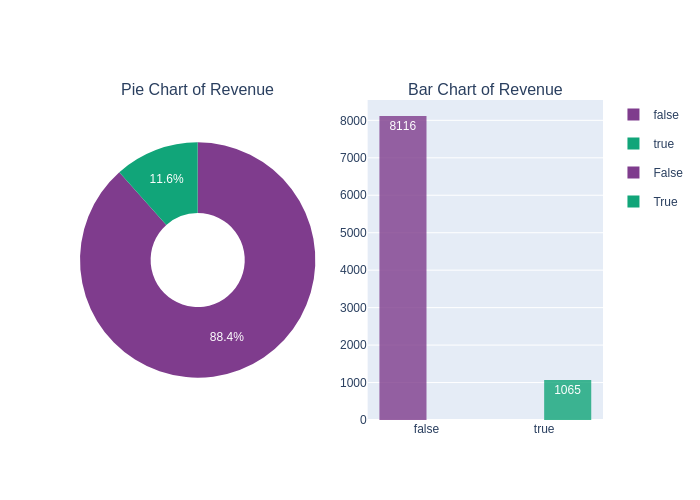

In [13]:
# Filename
filename = "plot_Revenue.png"

# Display the saved image in Colab
display(Image(filename))

**These two graphics show that 88.4% of visitors do not complete their session with a transaction. The remaining visitors complete with a transaction**